Os dados estão relacionados com campanhas de marketing direto (ligações telefónicas) de uma instituição bancária portuguesa. 
O objetivo da classificação é prever se o cliente irá subscrever um depósito a prazo.

In [1]:
from ucimlrepo import fetch_ucirepo

In [2]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222)

In [3]:
# data (as pandas dataframes) 
X_mkt = bank_marketing.data.features 
y_mkt = bank_marketing.data.targets 

In [4]:
# metadata 
print(bank_marketing.metadata)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [5]:
# variable information 
print(bank_marketing.variables)

           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical             None   
16            

# Analise Inicial dos dados

In [6]:
X_mkt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [7]:
y_mkt.head()

,y
0,no
1,no
2,no
3,no
4,no


In [8]:
y_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [9]:
X_mkt.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [10]:
X_mkt.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [11]:
# Removendo linhas com valores NaN de X_mkt
X_mkt = X_mkt.dropna(subset=['job', 'education', 'contact', 'poutcome'])

# Ajustando y_mkt para ter o mesmo número de linhas de X
y_mkt = y_mkt.loc[X_mkt.index]

In [12]:
X_mkt.shape

(7842, 16)

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb

In [14]:
X_mkt.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000
mean,40.783856,1552.343280,14.260010,261.290615,2.064269,223.252869,3.184264
std,11.282964,3084.580003,7.885328,236.203272,1.566109,111.830127,4.614190
min,18.000000,-1884.000000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,32.000000,162.000000,7.000000,113.000000,1.000000,133.000000,1.000000
50%,38.000000,595.000000,14.000000,194.000000,2.000000,195.000000,2.000000
75%,47.000000,1733.750000,20.000000,324.000000,2.000000,326.000000,4.000000
max,89.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


Text(0, 0.5, 'Quantidade')

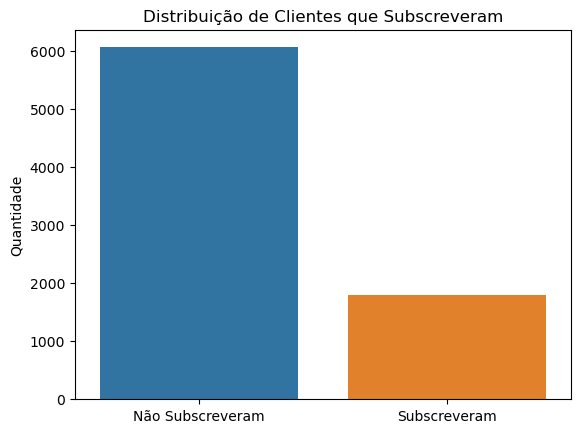

In [17]:
#Clientes que subescreveram ou nao
plt.title('Distribuição de Clientes que Subscreveram')
sns.countplot(x=y_mkt['y'])
plt.xticks([0, 1], ['Não Subscreveram', 'Subscreveram'])
plt.xlabel('')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Idade Geral')

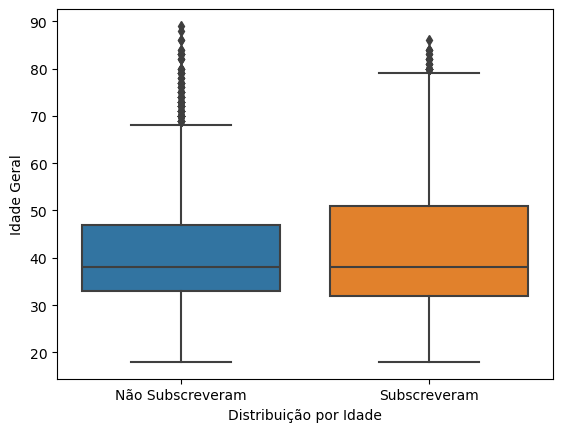

In [19]:
#DISTRIBUIÇÃO DE IDADE EM RELAÇÃO A SUBESCRIÇÃO
sns.boxplot(x=y_mkt['y'], y= X_mkt['age'])
plt.xticks([0,1], ['Não Subscreveram', 'Subscreveram'])
plt.xlabel('Distribuição por Idade')
plt.ylabel('Idade Geral')

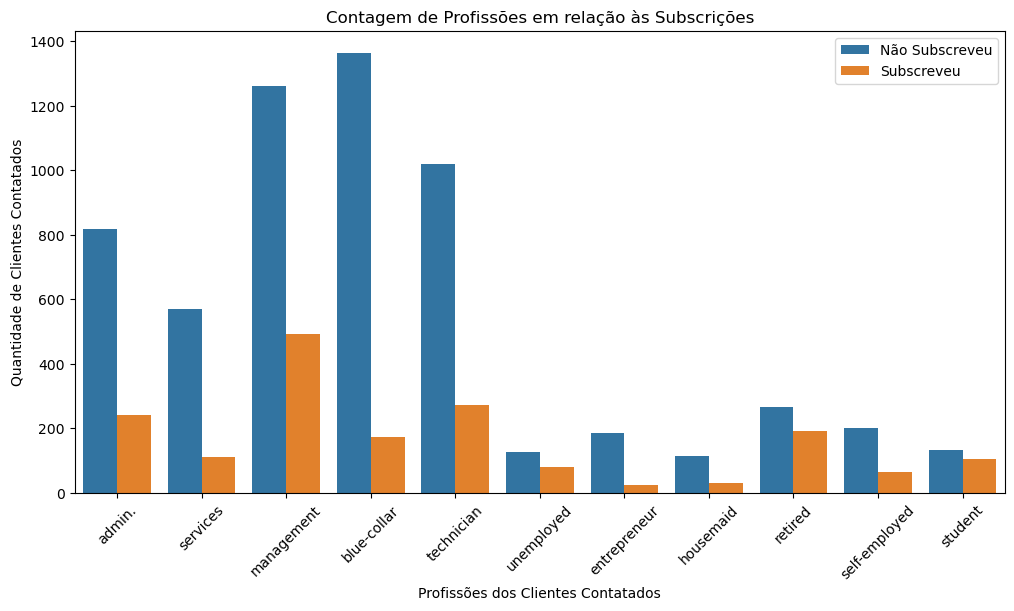

In [24]:
plt.figure(figsize=(12, 6))
legenda = {'yes': 'Subscreveu',
            'no': 'Não Subscreveu'}
ax = sns.countplot(x= X_mkt['job'], hue=y_mkt['y'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [legenda[label] for label in labels])

plt.xticks(rotation=45)
plt.title('Contagem de Profissões em relação às Subscrições')
plt.xlabel('Profissões dos Clientes Contatados')
plt.ylabel('Quantidade de Clientes Contatados')
plt.show()

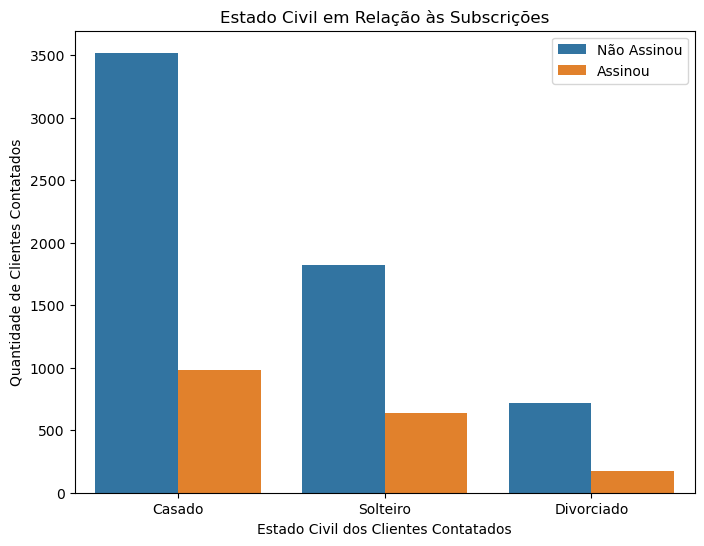

In [25]:
#distribuição do estado civil em relação a variavel alvo

plt.figure(figsize=(8, 6))
legenda_ec = {'yes': 'Assinou',
            'no': 'Não Assinou'}
ax1 = sns.countplot(x=X_mkt['marital'], hue=y_mkt['y'])

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, [legenda_ec[label] for label in labels])

plt.xticks([0,1,2], ['Casado', 'Solteiro', 'Divorciado'])
plt.title('Estado Civil em Relação às Subscrições')
plt.xlabel('Estado Civil dos Clientes Contatados')
plt.ylabel('Quantidade de Clientes Contatados')
plt.show()

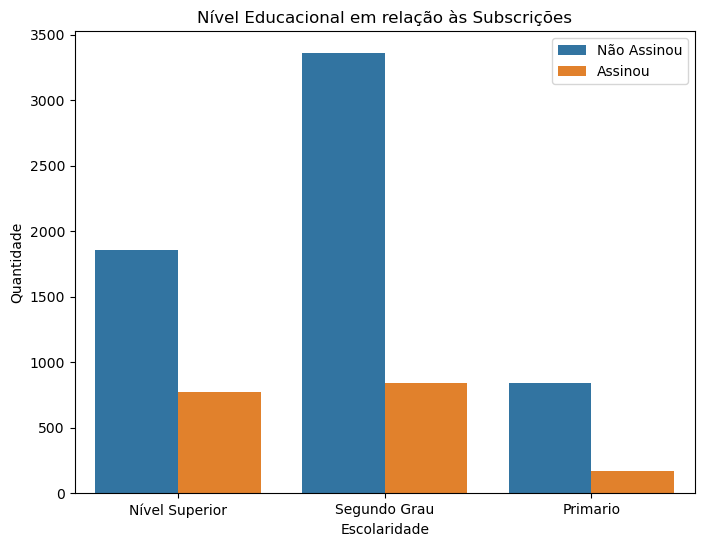

In [27]:
#distribuição nível educacional em relação a variavel alvo
plt.figure(figsize=(8, 6))
legenda_ec = {'yes': 'Assinou',
            'no': 'Não Assinou'}
ax2 = sns.countplot(x=X_mkt['education'], hue=y_mkt['y'])

control, labels = ax2.get_legend_handles_labels()
ax2.legend(control, [legenda_ec[label] for label in labels])

plt.xticks([0,1,2], ['Nível Superior', 'Segundo Grau', 'Primario'])
plt.title('Nível Educacional em Relação às Subscrições')
plt.xlabel('Nível Escolaridade')
plt.ylabel('Quantidade')
plt.show()

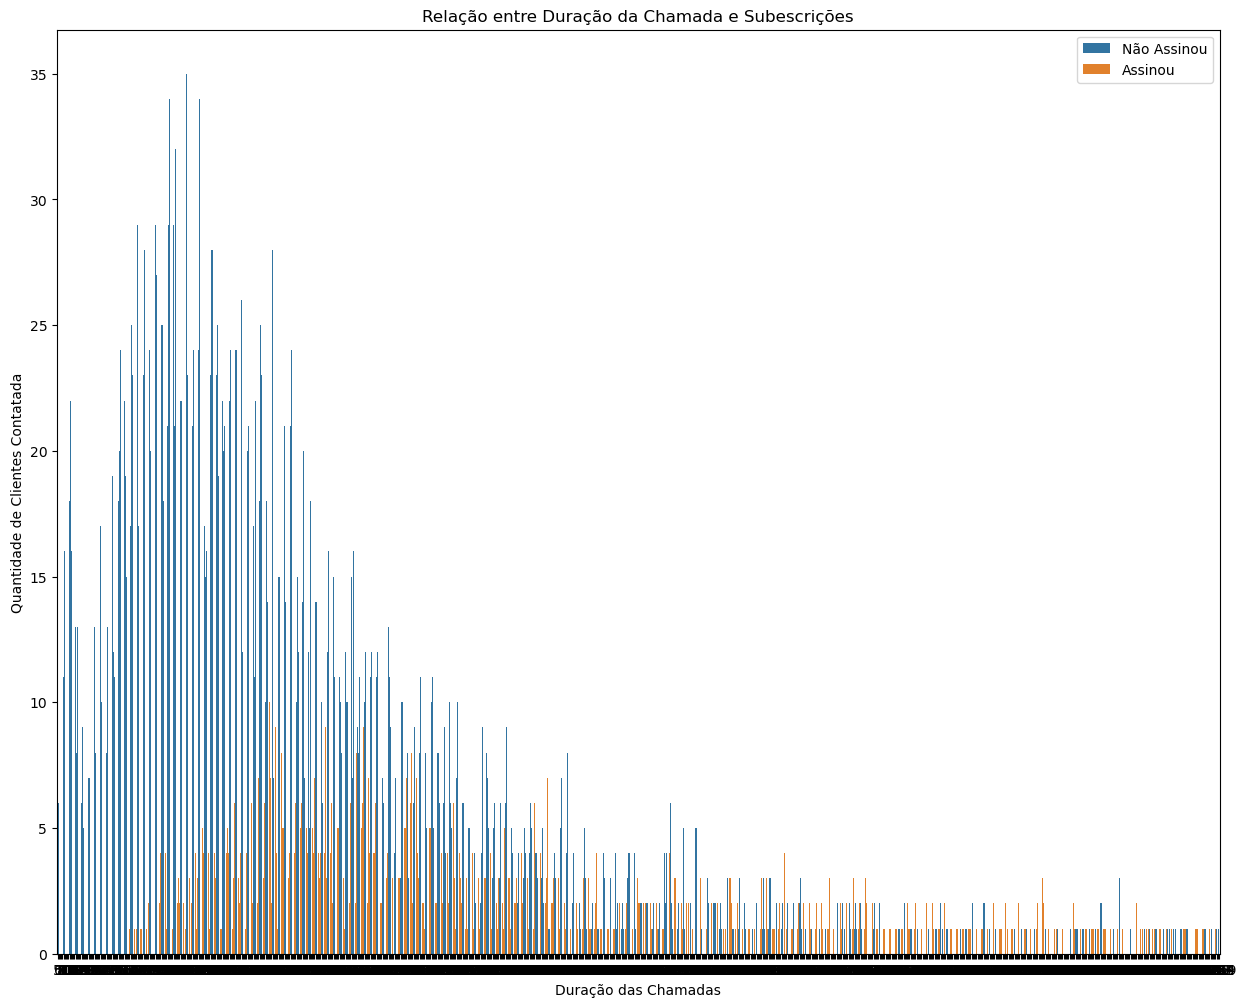

In [29]:
#relação entre duração da chamada e as assinaturas
plt.figure(figsize=(15,12))
legenda_ec = {'yes': 'Assinou',
            'no': 'Não Assinou'}
ax3 = sns.countplot(x=X_mkt['duration'], hue=y_mkt['y'])

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, [legenda_ec[label] for label in labels])

plt.title('Relação entre Duração da Chamada e Subescrições')
plt.xlabel('Duração das Chamadas')
plt.ylabel('Quantidade de Clientes Contatada')
plt.show()

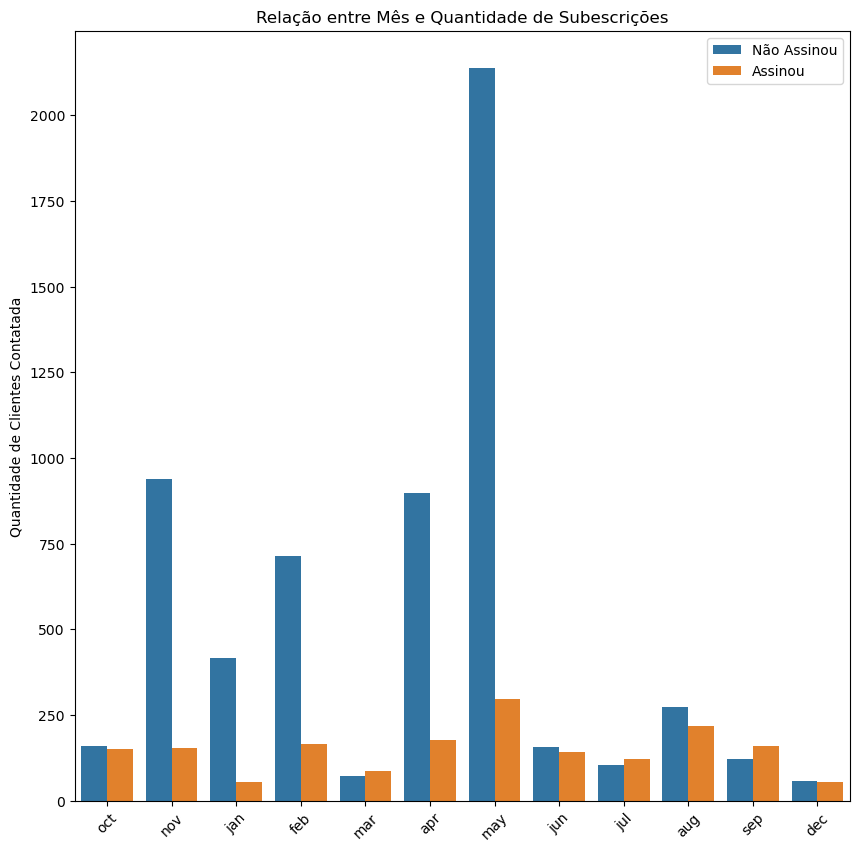

In [33]:
#relação entre mes e quantidade de subescrições
plt.figure(figsize=(10,10))

legenda_meses = {'yes': 'Assinou',
            'no': 'Não Assinou'}
ax2 = sns.countplot(x=X_mkt['month'], hue=y_mkt['y'])

control, labels = ax2.get_legend_handles_labels()
ax2.legend(control, [legenda_meses[label] for label in labels])

plt.title('Relação entre Mês e Quantidade de Subescrições')
plt.xlabel('')
plt.ylabel('Quantidade de Clientes Contatada')
plt.xticks(rotation=45)
plt.show()

# Pré processamento

In [34]:
#LabelEncoder converte variáveis categóricas em representações numericas
from sklearn.preprocessing import LabelEncoder

In [35]:
label_encoder_job = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_default = LabelEncoder()
label_encoder_housing = LabelEncoder()
label_encoder_month = LabelEncoder()
label_encoder_loan = LabelEncoder()
label_encoder_contact = LabelEncoder()
label_encoder_poutcome = LabelEncoder()
label_encoder_y = LabelEncoder()

In [36]:
X_mkt.iloc[:, 1] = label_encoder_job.fit_transform(X_mkt.iloc[:, 1])
X_mkt.iloc[:, 2] = label_encoder_marital.fit_transform(X_mkt.iloc[:, 2])
X_mkt.iloc[:, 3] = label_encoder_education.fit_transform(X_mkt.iloc[:, 3])
X_mkt.iloc[:, 4] = label_encoder_default.fit_transform(X_mkt.iloc[:, 4])
X_mkt.iloc[:, 6] = label_encoder_housing.fit_transform(X_mkt.iloc[:, 6])
X_mkt.iloc[:, 7] = label_encoder_month.fit_transform(X_mkt.iloc[:, 7])
X_mkt.iloc[:, 8] = label_encoder_loan.fit_transform(X_mkt.iloc[:, 8])
X_mkt.iloc[:, 10] = label_encoder_contact.fit_transform(X_mkt.iloc[:, 10])
X_mkt.iloc[:, 15] = label_encoder_poutcome.fit_transform(X_mkt.iloc[:, 15])
y_mkt.iloc[:, 0] = label_encoder_y.fit_transform(y_mkt.iloc[:, 0])

In [37]:
X_mkt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7842 entries, 24060 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          7842 non-null   int64 
 1   job          7842 non-null   object
 2   marital      7842 non-null   object
 3   education    7842 non-null   object
 4   default      7842 non-null   object
 5   balance      7842 non-null   int64 
 6   housing      7842 non-null   object
 7   loan         7842 non-null   object
 8   contact      7842 non-null   object
 9   day_of_week  7842 non-null   int64 
 10  month        7842 non-null   object
 11  duration     7842 non-null   int64 
 12  campaign     7842 non-null   int64 
 13  pdays        7842 non-null   int64 
 14  previous     7842 non-null   int64 
 15  poutcome     7842 non-null   object
dtypes: int64(7), object(9)
memory usage: 1.0+ MB


In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [39]:
onehotencoder_mkt = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 2, 3, 4, 6, 7, 8, 10, 15])], remainder='passthrough')
onehotencoder_y = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0])], remainder='passthrough')

In [40]:
X_mkt = onehotencoder_mkt.fit_transform(X_mkt)
y_mkt = onehotencoder_y.fit_transform(y_mkt)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_mkt = scaler.fit_transform(X_mkt)

# Divisão das variáveis Treino e Teste

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_mkt, y_mkt, test_size=0.3, random_state=0)

In [43]:
classificador_xgb = xgb.XGBClassifier()

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
#validação cruzada 
result_cross_validation = cross_val_score(classificador_xgb, X_train, y_train)

result_cross_validation

array([0.83060109, 0.86338798, 0.86065574, 0.8424408 , 0.83773929])

In [46]:
accuracy = result_cross_validation.mean()
accuracy

0.8469649798340566

In [47]:
accuracy = 100 * accuracy

accuracy

84.69649798340566

In [48]:
classificador = xgb.XGBClassifier()
classificador.objective

'binary:logistic'

In [49]:
classificador = xgb.XGBClassifier().fit(X_train, y_train)
classificador.objective

'binary:logistic'

In [50]:
classificador_tunado = xgb.XGBClassifier(max_depth=2)
100 * cross_val_score(classificador_tunado, X_train, y_train).mean()

85.64374108555705

In [51]:
classificador_dart = xgb.XGBClassifier(booster = 'dart')
100 * cross_val_score(classificador_dart, X_train, y_train).mean()

84.69649798340566

In [52]:
classificador_gblinear = xgb.XGBClassifier(booster = 'gblinear')
100 * cross_val_score(classificador_gblinear, X_train, y_train).mean()

84.29575278163827

In [53]:
classificador_camp = classificador_dart

In [54]:
 classificador_camp.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
predicao = classificador_camp.predict(X_test)

In [56]:
print(predicao)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [66]:
comparacao_df = pd.DataFrame({
    'Previsao': predicao[:, 1],
    'Real': y_test[:, 1]
})

# Exibe as primeiras linhas do DataFrame
print(comparacao_df.head(10))

   Previsao  Real
0       0.0   0.0
1       0.0   0.0
2       0.0   0.0
3       1.0   1.0
4       0.0   0.0
5       0.0   0.0
6       1.0   0.0
7       0.0   1.0
8       0.0   0.0
9       1.0   1.0


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Arredonda as probabilidades previstas para obter rótulos binários
predicoes_binarias = np.round(predicao[:, 1])

# Calcula métricas de avaliação
accuracy = accuracy_score(y_test[:, 1], predicoes_binarias)
precision = precision_score(y_test[:, 1], predicoes_binarias)
recall = recall_score(y_test[:, 1], predicoes_binarias)
f1 = f1_score(y_test[:, 1], predicoes_binarias)
roc_auc = roc_auc_score(y_test[:, 1], predicao[:, 1])

# Exibe as métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

Acurácia: 0.8538
Precisão: 0.7089
Revocação: 0.6450
F1 Score: 0.6755
AUC-ROC: 0.7816


In [60]:
from sklearn.metrics import confusion_matrix

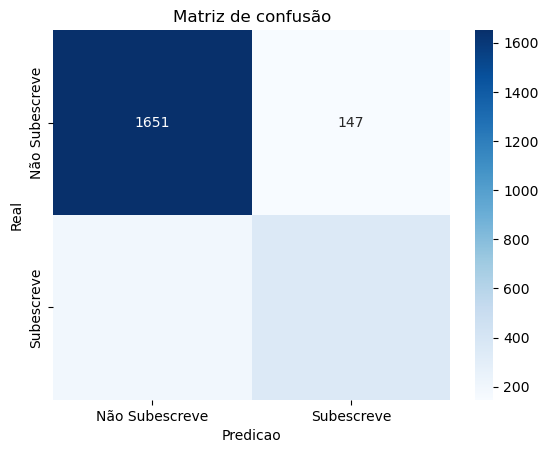

In [61]:
#matriz de confusão - avalia o desempenho do modelo de classificação
cm = confusion_matrix(y_test.argmax(axis=1), predicao.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Subescreve', 'Subescreve'], yticklabels=['Não Subescreve', 'Subescreve'])
plt.xlabel('Predicao')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()

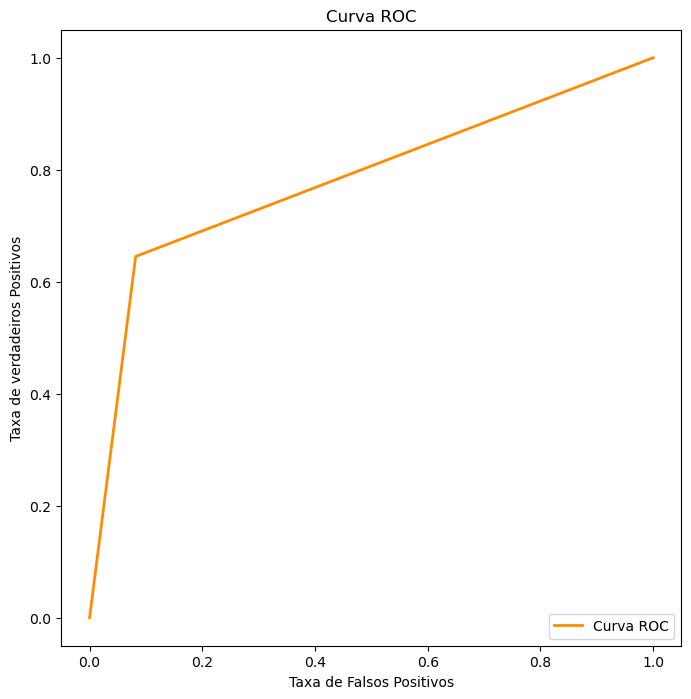

In [62]:
#Curva ROC - Receiver Operating Characterist
#Mostra taxa de verdadeiros positivos x taxa falso positivo 
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test[:, 1], predicao[:, 1])
roc_curve = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

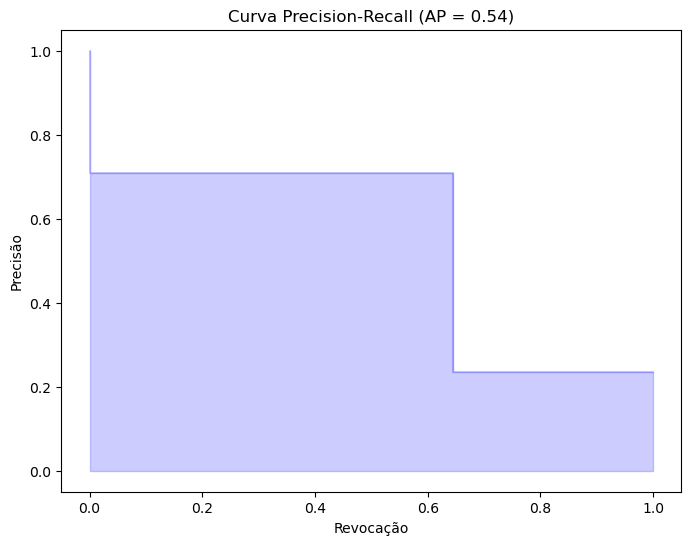

In [63]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test[:, 1], predicao[:, 1])
average_precision = average_precision_score(y_test[:, 1], predicao[:, 1])

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Revocação')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall (AP = {:.2f})'.format(average_precision))
plt.show()

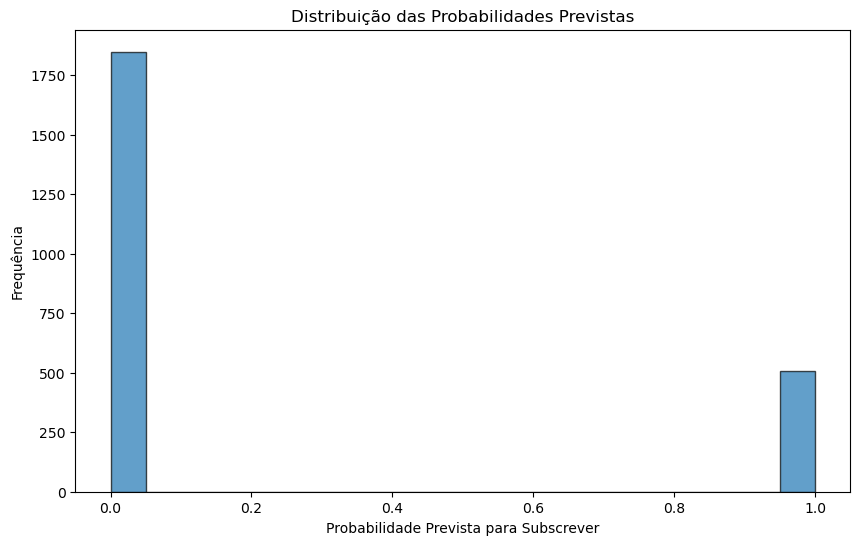

In [64]:
plt.figure(figsize=(10, 6))

# Probabilidades previstas para a classe positiva (subscrição de depósito a prazo)
probas = predicao[:, 1]

# Crie um histograma das probabilidades
plt.hist(probas, bins=20, edgecolor='black', alpha=0.7)

# Adicione rótulos e título
plt.xlabel('Probabilidade Prevista para Subscrever')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades Previstas')

plt.show()


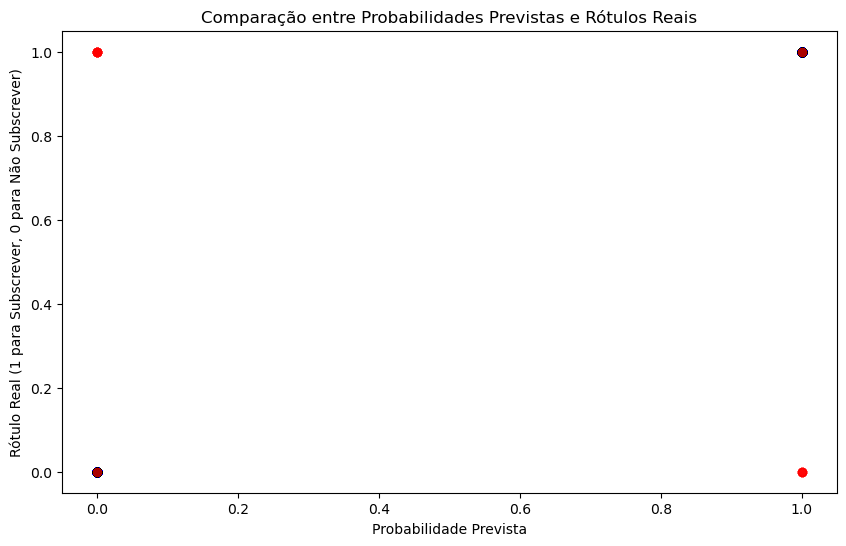

In [65]:
plt.figure(figsize=(10, 6))

# Extrair as probabilidades previstas para a classe positiva
probas = predicao[:, 1]

# Scatter plot das probabilidades previstas versus os rótulos reais
plt.scatter(probas, predicao[:, 1], color='blue', label='Previsoa')
plt.scatter(probas, y_test[:, 1], color='red', label='Real', alpha=0.01)
plt.xlabel('Probabilidade Prevista')
plt.ylabel('Rótulo Real (1 para Subscrever, 0 para Não Subscrever)')
plt.title('Comparação entre Probabilidades Previstas e Rótulos Reais')
plt.show()
